# IBM Supervised Machine Learning: Classification

- Pedro Antonio Vázquez González

This analysis is to test the concepts learned during the IBM Coursera Classification course. I chose the Breast Cancer dataset out of curiosity to analyze the results of different classification methods and how they vary by applying transformations to the data or creating new synthetic data in the class with less data.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

### Information Dataset
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [2]:
cancer_ds = load_breast_cancer()

data = pd.DataFrame(cancer_ds.data, columns=cancer_ds.feature_names)
data['class'] = cancer_ds.target

print(f"Data shape: {data.shape[0]} rows and {data.shape[1]} columns\n")
print(f"Data info: {data.info()}\n")

data.sample(10)

Data shape: 569 rows and 31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    fl

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,17.81,91.38,545.2,0.1427,0.25850,0.09915,0.08187,0.3469,0.09241,1
535,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.06251,...,25.48,160.20,1809.0,0.1268,0.31350,0.44330,0.21480,0.3077,0.07569,0
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,...,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710,0
488,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,0.06401,...,21.59,86.57,549.8,0.1526,0.14770,0.14900,0.09815,0.2804,0.08024,1
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,31.99,92.74,622.9,0.1256,0.18040,0.12300,0.06335,0.3100,0.08203,1
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463,1
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,0
464,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,23.89,95.10,687.6,0.1282,0.19650,0.18760,0.10450,0.2235,0.06925,1
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,...,31.98,100.40,734.6,0.1017,0.14600,0.14720,0.05563,0.2345,0.06464,1


Values of every class: 
benign       357
malignant    212
Name: count, dtype: int64



<Axes: title={'center': 'Breast Cancer Cases'}, xlabel='Class', ylabel='Number of cases'>

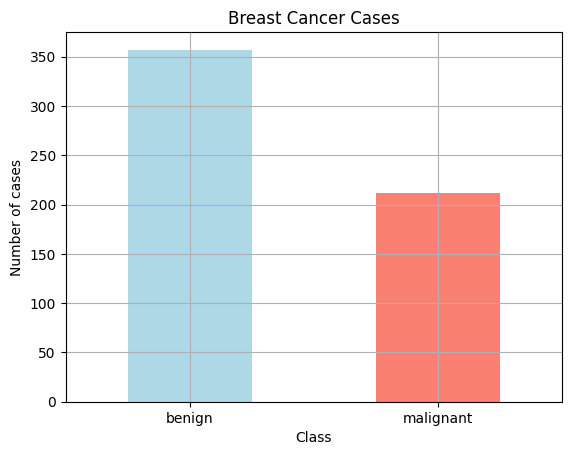

In [3]:
print(
    f"Values of every class: \n{pd.Series(cancer_ds.target).map(lambda x: cancer_ds.target_names[x]).value_counts()}\n"
)

data["class"].map(lambda x: cancer_ds.target_names[x]).value_counts().plot(
    kind="bar",
    color=["lightblue", "salmon"],
    title="Breast Cancer Cases",
    xlabel="Class",
    ylabel="Number of cases",
    grid=True,
    rot=("horizontal")
)

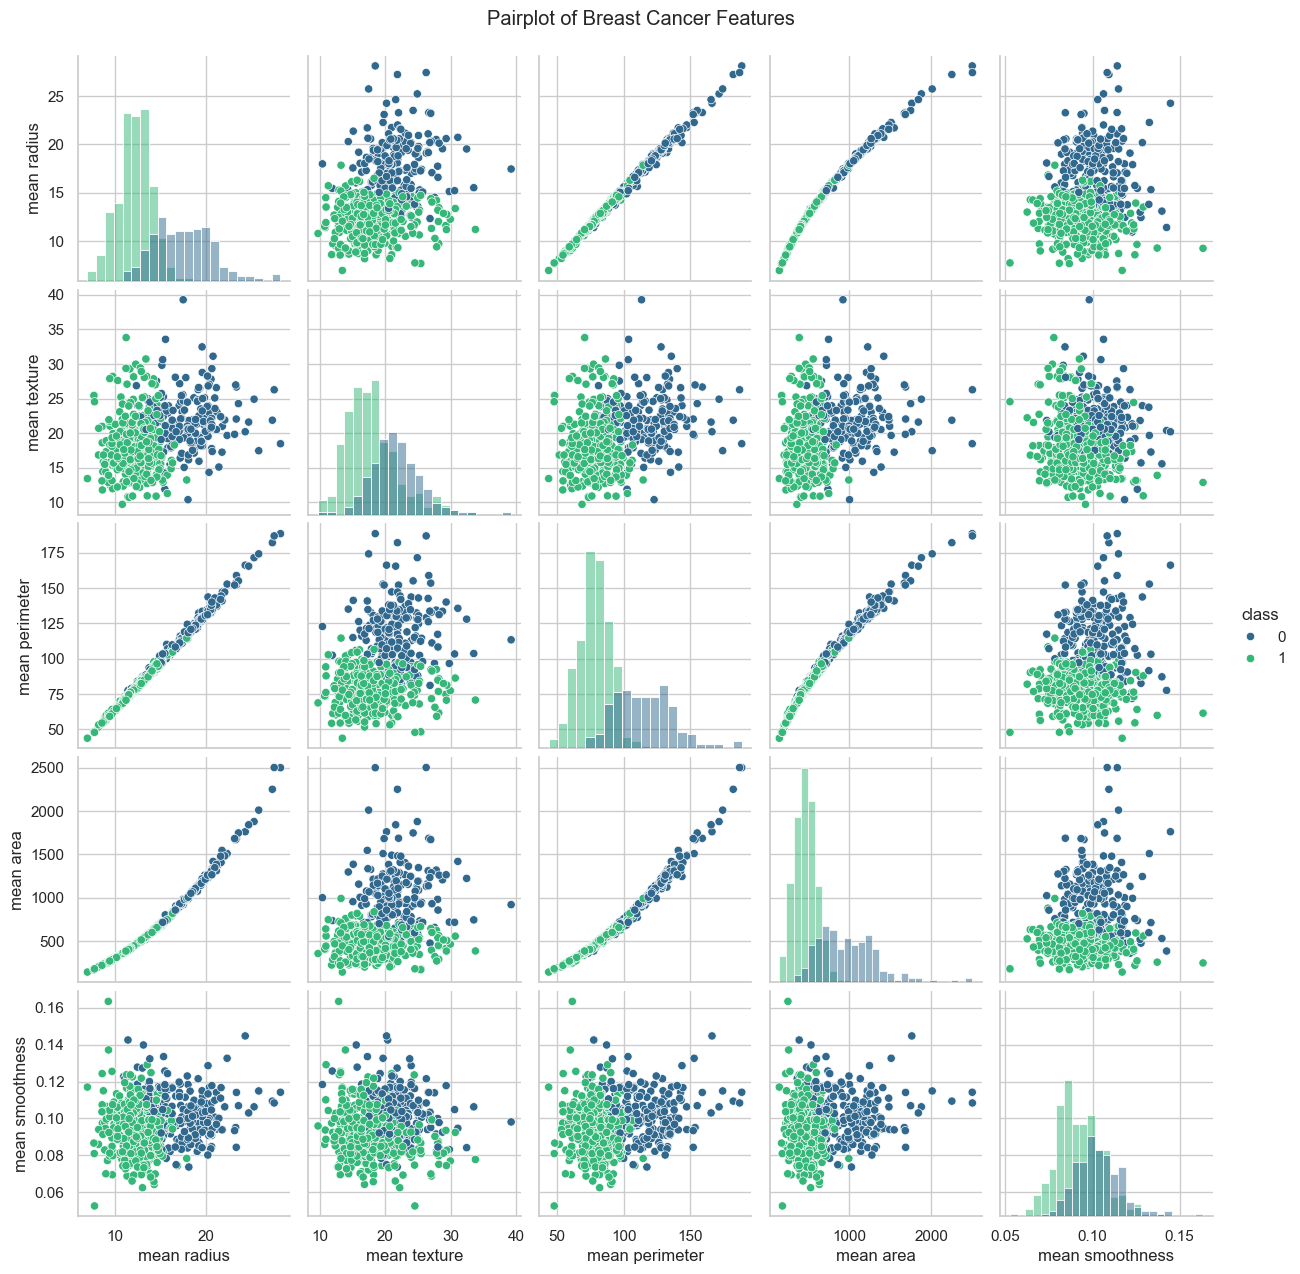

In [4]:
sns.set_theme(style="whitegrid")

pair_plot = sns.pairplot(data, hue='class', vars=cancer_ds.feature_names[:5], palette='viridis', diag_kind='hist')
pair_plot.figure.suptitle('Pairplot of Breast Cancer Features', y=1.02)
plt.show()

In [5]:
X = data.drop(columns=['class'])
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

At this point we are going to evaluate different models seen in this course. We have the normal SVC, Random Forest and Gradiant Boosting in order to test different classification levels and classification methods, all while using Cross Validation with the Grid method.

In [7]:
classifiers = {
    "SVC": GridSearchCV(
        SVC(),
        param_grid={
            "C": [0.1, 1, 10, 100],
            "gamma": [1, 0.1, 0.01, 0.001],
            "kernel": ["rbf"],
        },
        refit=True,
        verbose=2,
        n_jobs=-1,
        error_score=0,
    ),
    "RandomForest": GridSearchCV(
        RandomForestClassifier(),
        param_grid={
            "n_estimators": [50, 100, 200],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [4, 6, 8, 10],
        },
        refit=True,
        verbose=2,
        n_jobs=-1,
        error_score=0,
    ),
    "GradientBoosting": GridSearchCV(
        GradientBoostingClassifier(),
        param_grid={
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 4, 5],
        },
        refit=True,
        verbose=2,
        n_jobs=-1,
        error_score=0,
    ),
}

In [8]:
predictions = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    print(f"Best parameters for {name}: {clf.best_params_}\n")
    predictions[name] = clf.predict(X_test)

Training SVC...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=

Classification report for SVC:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



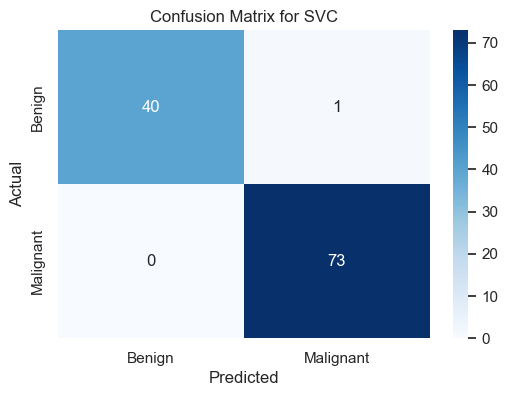

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



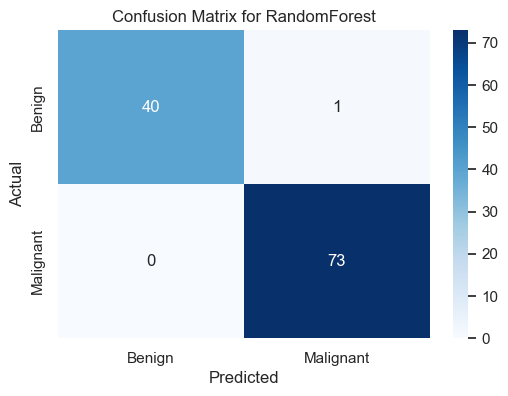

Classification report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



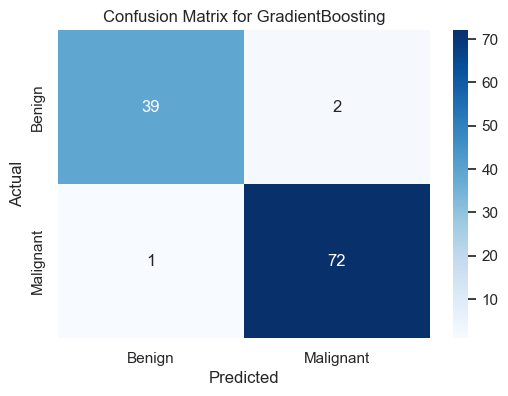

In [9]:
for name, y_pred in predictions.items():
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


The results show very similar results for the classifications due to the limited dataset we have. Demonstrating that mainly SVC and Random Forest have better results when classifying.
We can say that **with well-regulated use of SVC it ​​is sufficient in this case** to classify breast cancer cases.

## Use SMOTE to make Oversampling 
This is the most interesting test, as we will test if it makes any difference (hard to beat) when creating synthetic data for the lowest class using SMOTE.

In [10]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [11]:
smote_sampler = SMOTE(random_state = 123)

In [12]:
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

<Axes: xlabel='class'>

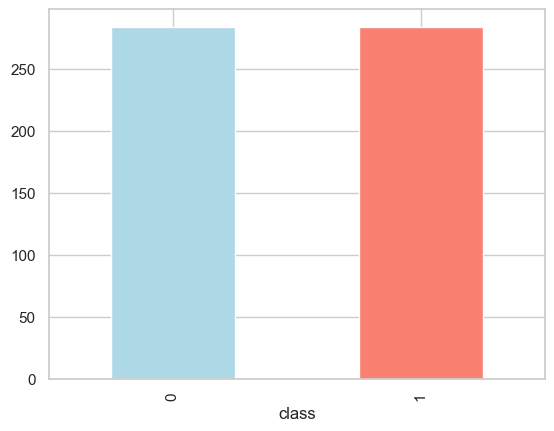

In [13]:
y_smo.value_counts().plot.bar(color=['lightblue', 'salmon'])

In [14]:
predictions_smo = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_smo, y_smo)
    print(f"Best parameters for {name}: {clf.best_params_}\n")
    predictions_smo[name] = clf.predict(X_test)

Training SVC...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C

Classification report for SVC:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



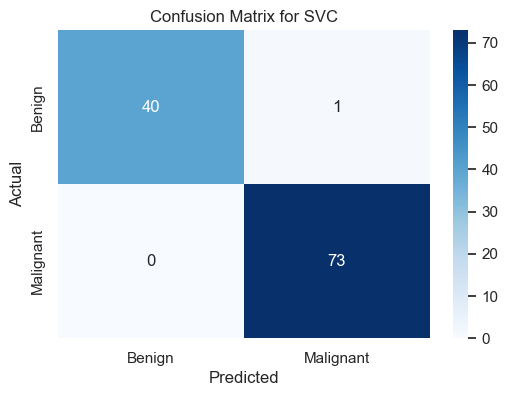

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



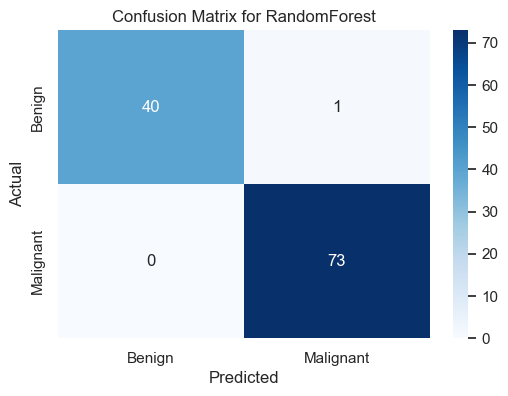

Classification report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



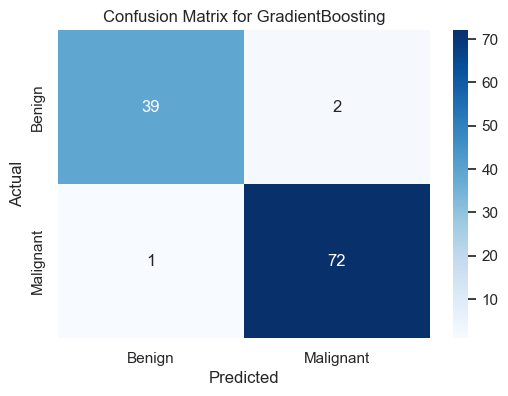

In [15]:
for name, y_pred in predictions_smo.items():
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Conclusions
It appears that the results are completely similar regardless of whether we create more synthetic data for the lowest class or leave it with the original distribution of the dataset. This is due to the size of the lowest class, which despite having less data, is a representative sample of the cases we have. And that is what we are looking for, to make the sample representative for the case study.

### Some solutions or improvements
To study what we have learned, we can implement different datasets that allow us to have more biased data that test the algorithms presented. However, this also has a very large filter and that is that the person in charge of collecting the data is often the one in charge of taking representative samples. But when confronted in real life, we may come across information that we have to process so that the classifiers work much better.